In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import re
import spacy
import string

In [3]:
import itertools

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import text_cleaning_functions as clean

In [55]:
from sklearn.preprocessing import StandardScaler

In [8]:
nlp = spacy.load("en_core_web_sm")

In [31]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [32]:
train['text_lower'] = train['text'].str.lower()
test['text_lower'] = test['text'].str.lower()

In [33]:
train['text_clean'] = train['text_lower'].apply(lambda x: clean.remove_URL(x))
train['text_clean'] = train['text_clean'].apply(lambda x: clean.remove_emoji(x))
train['text_clean'] = train['text_clean'].apply(lambda x: clean.remove_html(x))
train['text_clean'] = train['text_clean'].apply(lambda x: clean.remove_punctuation(x))
train['text_clean'] = train['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
test['text_clean'] = test['text_lower'].apply(lambda x: clean.remove_URL(x))
test['text_clean'] = test['text_clean'].apply(lambda x: clean.remove_emoji(x))
test['text_clean'] = test['text_clean'].apply(lambda x: clean.remove_html(x))
test['text_clean'] = test['text_clean'].apply(lambda x: clean.remove_punctuation(x))
test['text_clean'] = test['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [35]:
train['str_length'] = train['text'].str.len()
test['str_length'] = test['text'].str.len()

In [36]:
train['num_words'] = train['text'].str.split().map(lambda x: len(x))
test['num_words'] = test['text'].str.split().map(lambda x: len(x))

In [37]:
train['num_numbers'] = [clean.count_numbers(text, nlp) for text in train['text'].to_list()]
test['num_numbers'] = [clean.count_numbers(text, nlp) for text in test['text'].to_list()]

In [38]:
train['num_punc'] = [clean.count_punc(text, nlp) for text in train['text'].to_list()]
test['num_punc'] = [clean.count_punc(text, nlp) for text in test['text'].to_list()]

In [39]:
train.head()

,id,keyword,location,text,target,text_lower,text_clean,str_length,num_words,num_numbers,num_punc
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,deeds reason earthquake may allah forgive us,69,13,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada,38,7,0,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...,133,22,0,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,65,8,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,got sent photo ruby alaska smoke wildfires pou...,88,16,0,2


In [52]:
train['num_gpe'] = [clean.count_ner(text, nlp, "GPE") for text in train['text'].to_list()]
test['num_gpe'] = [clean.count_ner(text, nlp, "GPE") for text in test['text'].to_list()]

In [53]:
train.head()

,id,keyword,location,text,target,text_lower,text_clean,str_length,num_words,num_numbers,num_punc,num_gpe
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,deeds reason earthquake may allah forgive us,69,13,0,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada,38,7,0,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...,133,22,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,65,8,1,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,got sent photo ruby alaska smoke wildfires pou...,88,16,0,1,1


In [54]:
train_small = train[['str_length','num_words','num_numbers','num_punc','num_gpe']]
test_small = test[['str_length','num_words','num_numbers','num_punc','num_gpe']]

In [56]:
train_small

,str_length,num_words,num_numbers,num_punc,num_gpe
0,69,13,0,0,0
1,38,7,0,1,1
2,133,22,0,0,0
3,65,8,1,1,1
4,88,16,0,1,1
...,...,...,...,...,...
7608,83,11,1,0,0
7609,125,20,0,1,1
7610,65,8,0,0,0
7611,137,19,0,1,1


In [57]:
def scale(df, scaler):
    return scaler.fit_transform(df)

#and scal
meta_train = scale(train_small, StandardScaler())
meta_test = scale(test_small, StandardScaler())

In [59]:
meta_train

array([[-0.94843942, -0.33208487, -0.45793732, -0.42235528, -0.42235528],
       [-1.86616648, -1.37879841, -0.45793732,  1.71269832,  1.71269832],
       [ 0.9462229 ,  1.23798544, -0.45793732, -0.42235528, -0.42235528],
       ...,
       [-1.06685581, -1.20434615, -0.45793732, -0.42235528, -0.42235528],
       [ 1.0646393 ,  0.71462867, -0.45793732,  1.71269832,  1.71269832],
       [-0.20833695, -0.33208487, -0.45793732,  1.71269832,  1.71269832]])

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D,
                          Concatenate,
                          LeakyReLU,
                          SpatialDropout1D)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model

In [60]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [61]:
RANDOM_STATE = 2

In [62]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('glove.6B.100d.txt')
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [64]:
train_1 = train.text_clean.values
test_1 = test.text_clean.values
sentiments = train.target.values

In [68]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_1)
vocab_length = len(word_tokenizer.word_index) + 1

In [69]:
longest_train = max(train_1, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))
padded_sentences = pad_sequences(embed(train_1), length_long_sentence, padding='post')
test_sentences = pad_sequences(embed(test_1), length_long_sentence, padding='post')

In [70]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [93]:
embedding = Embedding(input_dim=embedding_matrix.shape[0], 
                      output_dim=embedding_matrix.shape[1], 
                      weights = [embedding_matrix], 
                      input_length=length_long_sentence,
                      trainable = False)

In [111]:
BATCH_SIZE = 32
EPOCHS = 5

In [112]:
def create_lstm(dropout1, dropout2, recurrent_dropout, learning_rate, lstm_layer):
    #define activation
    activation = LeakyReLU(alpha = 0.01)
    
    #define inputs
    nlp_input = Input(shape = (length_long_sentence,), name = 'nlp_input')
    meta_input_train = Input(shape = (5, ), name = 'meta_train')
    emb = embedding(nlp_input)
    emb = SpatialDropout1D(dropout2)(emb)

    #add LSTM layer
    nlp_out = (Bidirectional(LSTM(lstm_layer, 
                                  dropout = dropout1, 
                                  recurrent_dropout = recurrent_dropout,
                                  return_sequences = True)))(emb)  
    nlp_out = (GlobalMaxPool1D())(nlp_out)
    
    #add meta data    
    x = Concatenate()([nlp_out, meta_input_train])
    
    #add output layer
    x = Dropout(dropout2)(x)
    preds = Dense(1, activation='sigmoid')(x)
    
    #compile model
    model = Model(inputs=[nlp_input , meta_input_train], outputs = preds)
    optimizer = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [113]:
lstm = create_lstm(dropout1 = 0, dropout2 = 0.2, recurrent_dropout = 0,
                     learning_rate = 3e-4, lstm_layer = length_long_sentence)
lstm.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          [(None, 24)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 24, 100)      1793900     nlp_input[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_5 (SpatialDro (None, 24, 100)      0           embedding_1[5][0]                
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional (None, 24, 48)       24000       spatial_dropout1d_5[0][0]        
____________________________________________________________________________________________

In [114]:
#fit model
history = lstm.fit([padded_sentences, meta_train], 
                    sentiments, 
                    validation_split = .15,
                    epochs = EPOCHS, 
                    batch_size = BATCH_SIZE, 
                    verbose = 1)

Epoch 1/5
203/203 [==============================] - 7s 20ms/step - loss: 0.6272 - accuracy: 0.6572 - val_loss: 0.4851 - val_accuracy: 0.7933
Epoch 2/5
203/203 [==============================] - 4s 18ms/step - loss: 0.5035 - accuracy: 0.7656 - val_loss: 0.4483 - val_accuracy: 0.8004
Epoch 3/5
203/203 [==============================] - 3s 17ms/step - loss: 0.4604 - accuracy: 0.7896 - val_loss: 0.4374 - val_accuracy: 0.8012
Epoch 4/5
203/203 [==============================] - 4s 19ms/step - loss: 0.4462 - accuracy: 0.8093 - val_loss: 0.4362 - val_accuracy: 0.8065
Epoch 5/5
203/203 [==============================] - 3s 15ms/step - loss: 0.4469 - accuracy: 0.7977 - val_loss: 0.4361 - val_accuracy: 0.8021


In [115]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

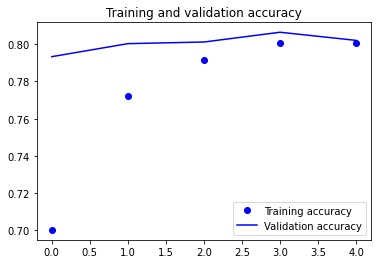

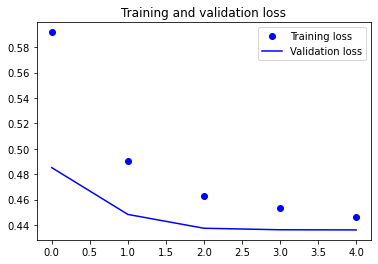

In [116]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [120]:
submission_lstm = pd.DataFrame()
submission_lstm['id'] = test['id']
submission_lstm['prob'] = lstm.predict([test_sentences, meta_test])
submission_lstm['target'] = submission_lstm['prob'].apply(lambda x: 0 if x < .5 else 1)
submission_lstm = submission_lstm[['id','target']]

In [121]:
submission_lstm.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [122]:
submission_lstm.to_csv("more_complex_lstm1.csv", index=False)